In [1]:
import sys
import os
%load_ext tensorboard

os.chdir("C:/Users/StarDust/PycharmProjects/phd/")

In [2]:
from run import inception_unet_predict

Using TensorFlow backend.


Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
cer = inception_unet_predict("E:\\python\\phd\\datasets\\mrbrains_full_2013\\TrainingData\\1\\T1.nii", 7)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.gfile.GFile.


In [4]:
import nibabel as nib
affine = [[-0.95833302, 0., 0., 110.89199829], [0., -0.91877592, -0.85302001, 115.17299652], [0., -0.27249241, 2.87616897, -15.59920025], [0., 0., 0., 1.]]
nifti_cer = nib.Nifti1Image(cer, affine)
print(nifti_cer.shape)

(240, 240, 48)


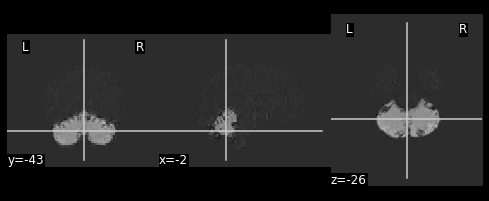

In [5]:
from nilearn.plotting import view_img, glass_brain, plot_anat, plot_epi
plot_anat(nifti_cer, display_mode='ortho')

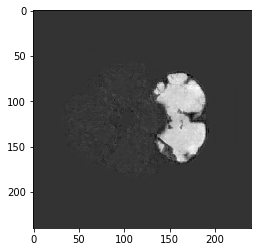

In [6]:
import matplotlib.pyplot as plt
plt.imshow(nifti_cer.get_fdata()[:,:,10], cmap='gray', aspect='equal', resample=False)


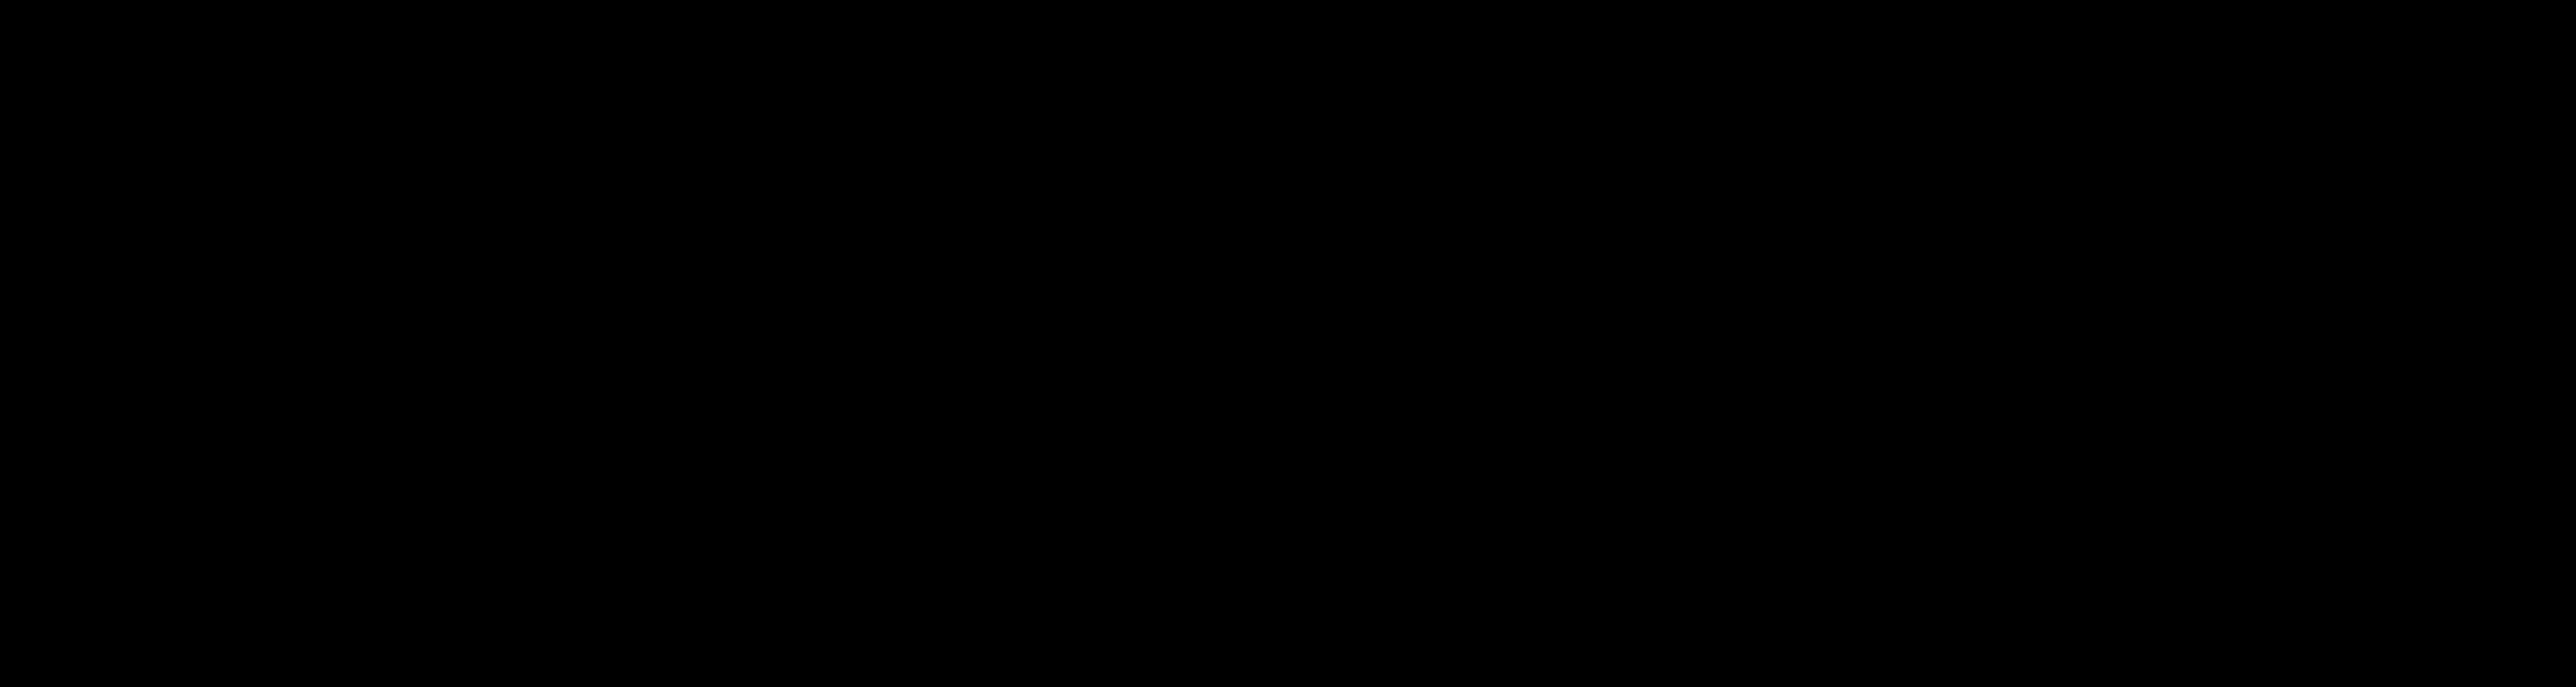
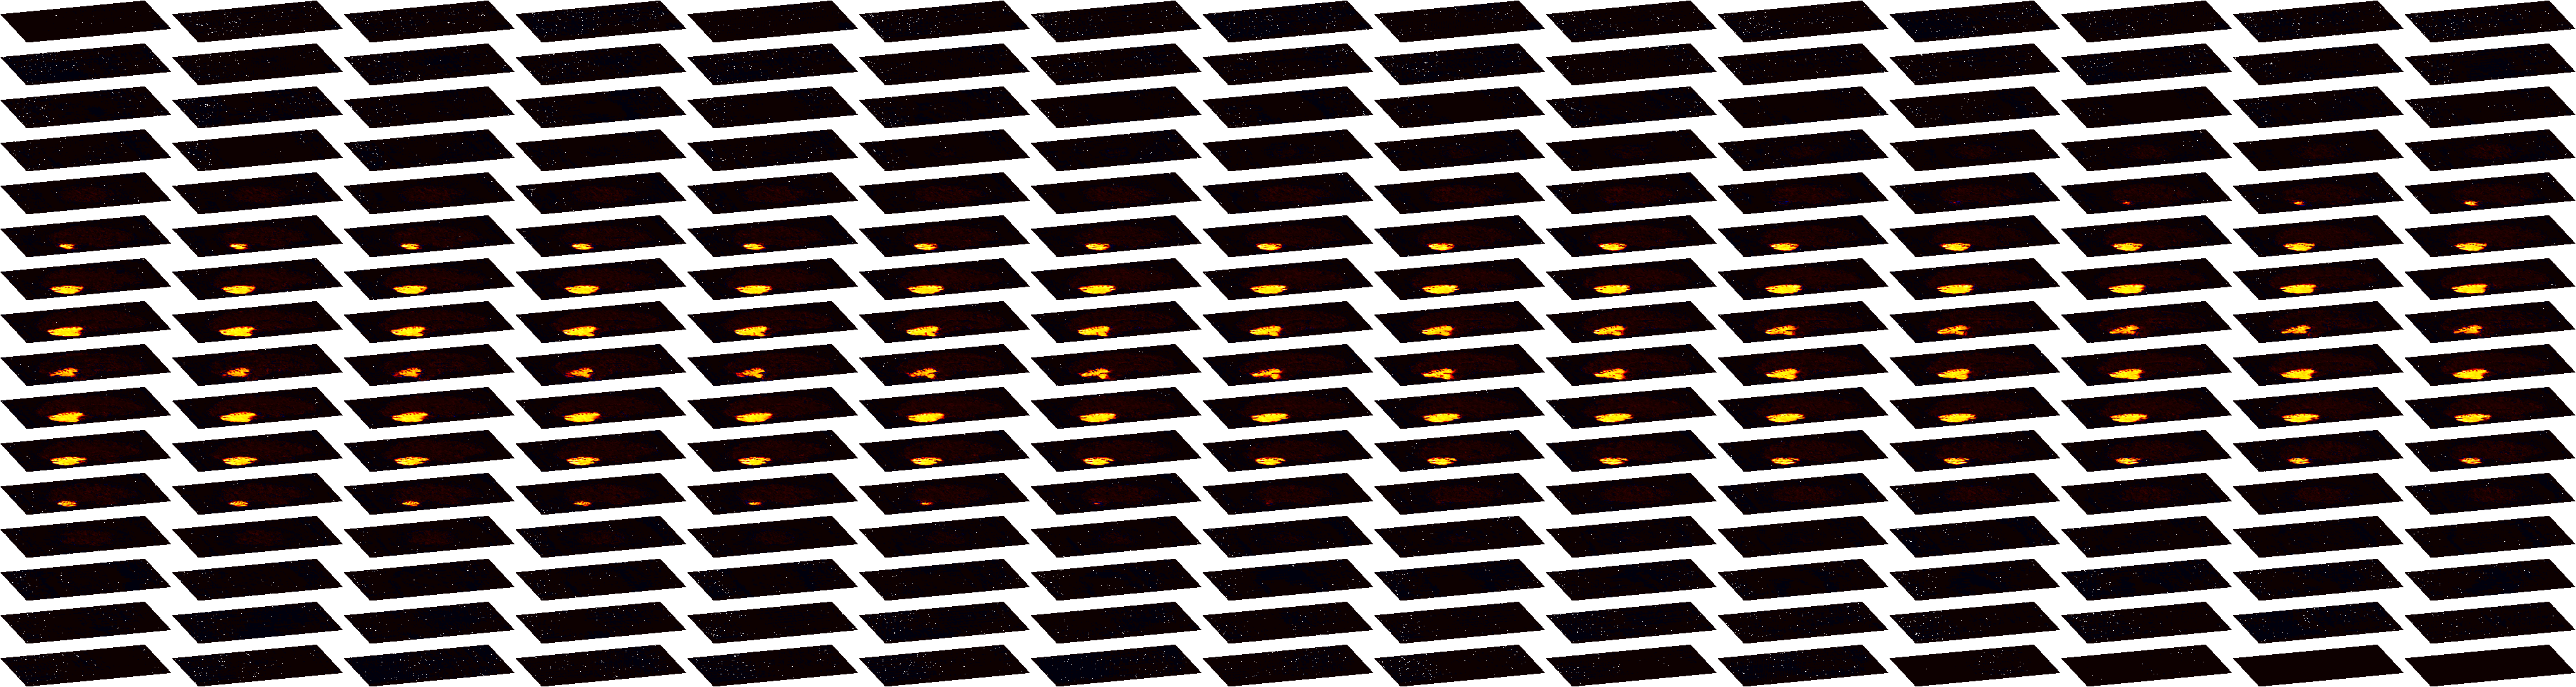

In [7]:
view_img(nifti_cer, None)

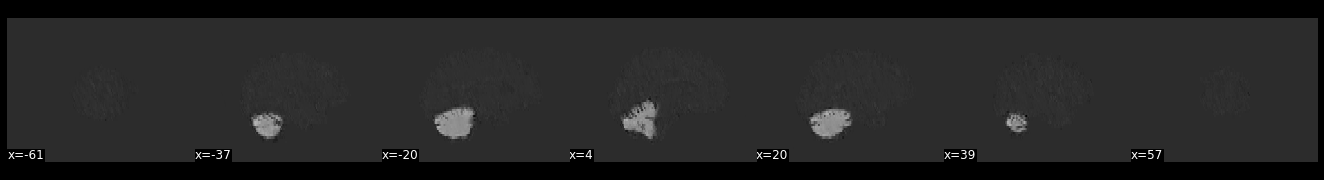

In [9]:
plot_anat(nifti_cer, draw_cross=False, display_mode='x')

In [8]:
nib.save(nifti_cer, "e:/python/CNN-TensorFlow/Brain-Segmentation-master/output/my_net_cerebellum.nii")

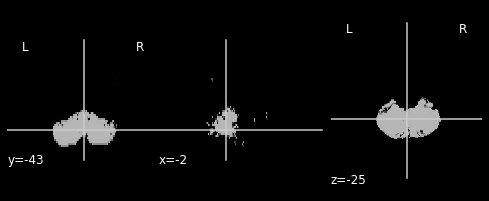

In [19]:
import numpy as np
cer2 = np.array(cer > 0.2).astype(np.uint8)
nifti_cer2 = nib.Nifti1Image(cer2, affine)
plot_anat(nifti_cer2, display_mode='ortho')

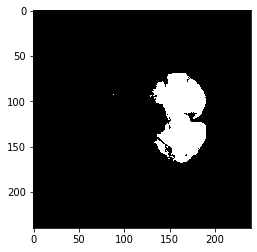

In [20]:
plt.imshow(nifti_cer2.get_fdata()[:,:,10], cmap='gray', aspect='equal', resample=False)


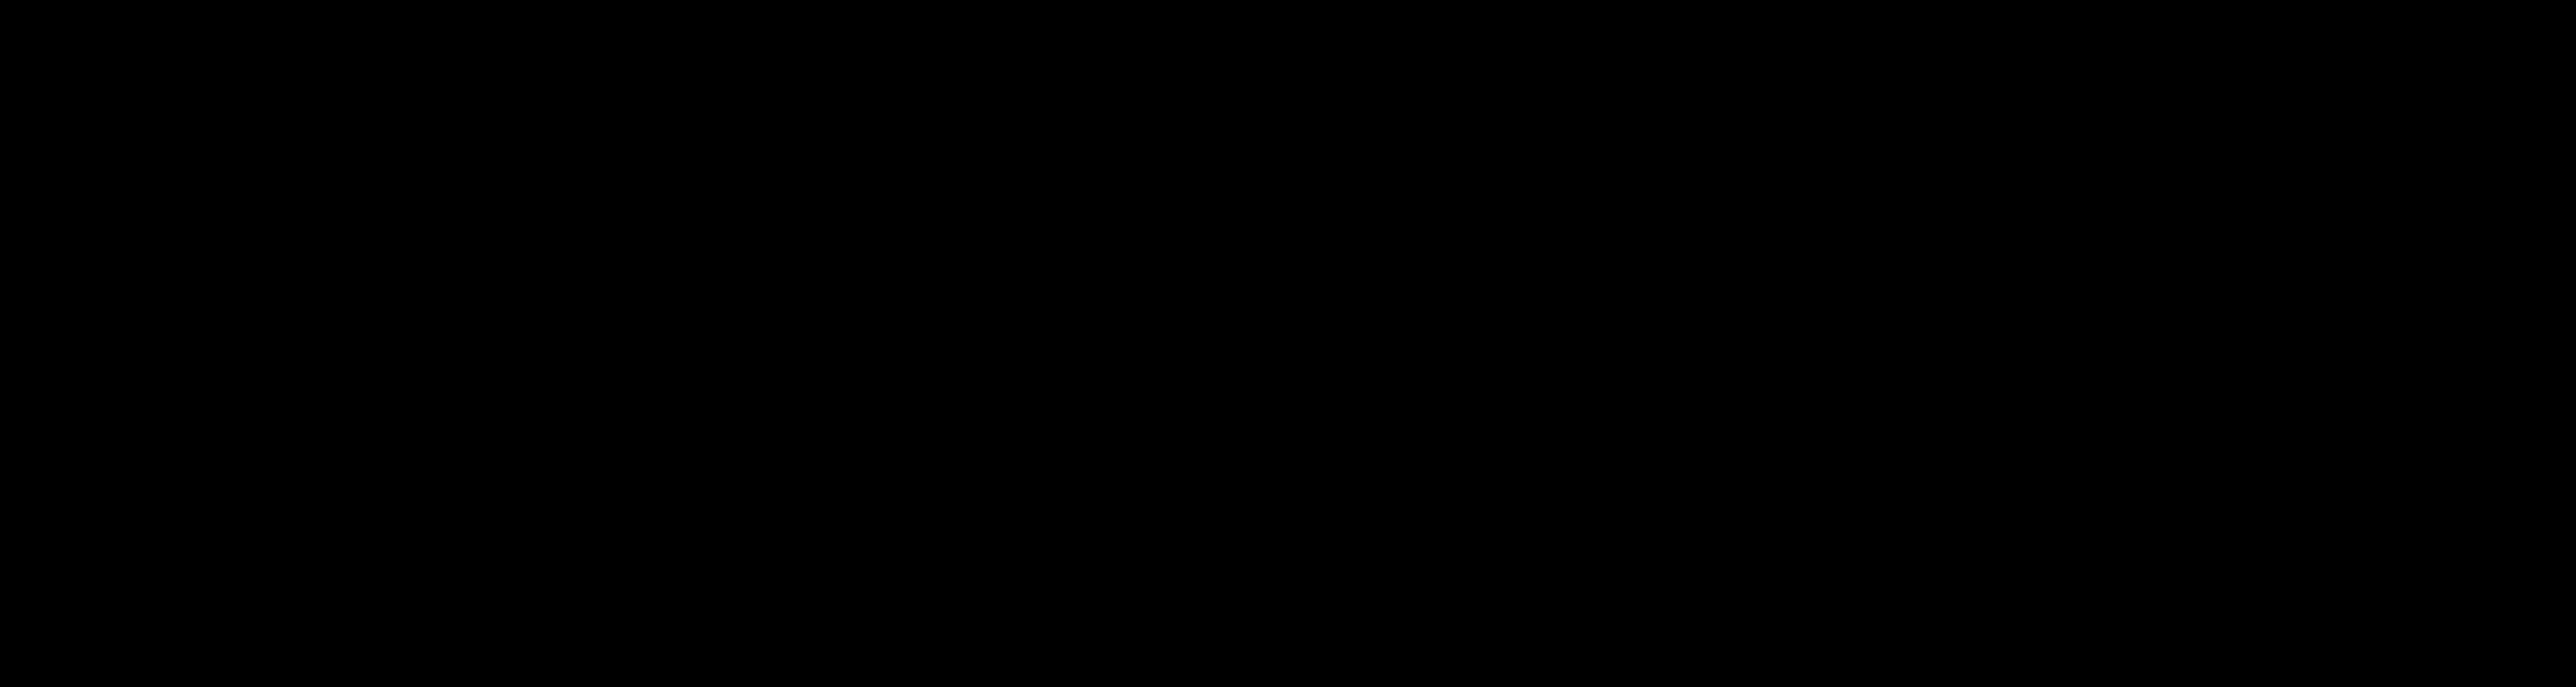
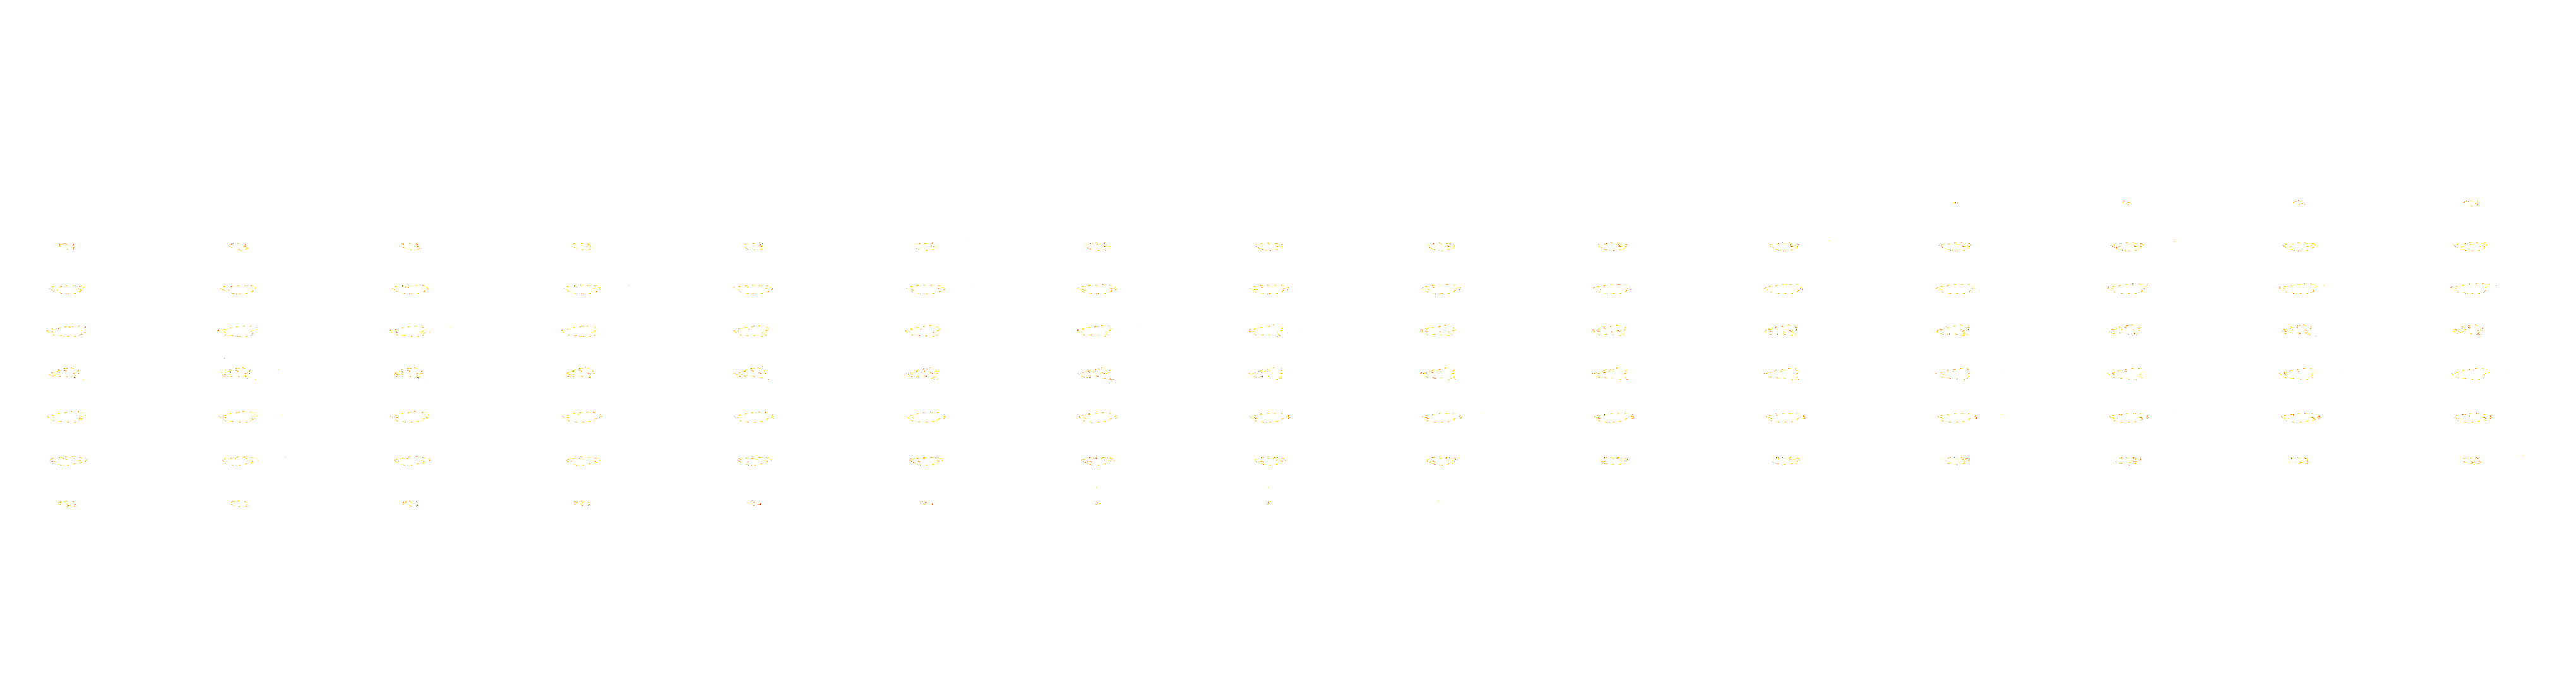

In [21]:
view_img(nifti_cer2, None)

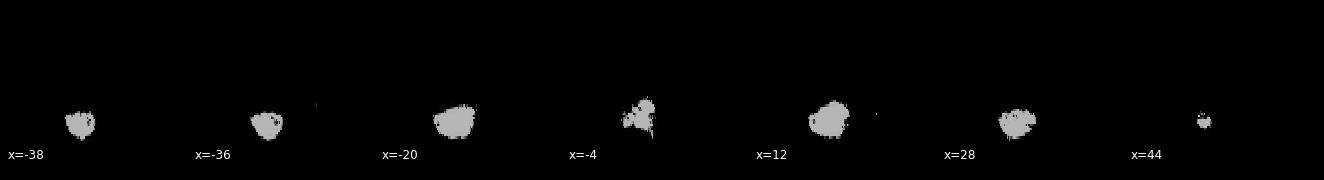

In [22]:
plot_anat(nifti_cer2, draw_cross=False, display_mode='x')

In [14]:
nib.save(nifti_cer2, "e:/python/CNN-TensorFlow/Brain-Segmentation-master/output/my_net_cerebellum2.nii")

In [15]:
orig = nib.load("E:\\python\\phd\\datasets\\mrbrains_full_2013\\TrainingData\\1\\LabelsForTraining.nii")

In [16]:
pred_ = np.array(nifti_cer2.get_data() > 0.5).astype(np.uint8)
true_ = np.array(orig.get_data() == 7).astype(np.uint8)

C:\Users\StarDust\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """Entry point for launching an IPython kernel.
C:\Users\StarDust\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  


In [17]:
_int = 0
_uni = 0
for i in range(len(pred_)):
    for j in range(len(pred_[i])):
        for k in range(len(pred_[i][j])):
            if pred_[i][j][k]> 0 and pred_[i][j][k] == true_[i][j][k]:
                _int += 1
                _uni += 1
            elif pred_[i][j][k]> 0 or true_[i][j][k]> 0:
                _uni += 1

In [18]:
jc = _int * 1. / _uni
dc = 2. * _int / (_int + _uni)
print('jaccard similarity: {0}\ndice score: {1}'.format(jc, dc))

jaccard similarity: 0.8837350665139223
dice score: 0.938279572561528
